(c) 2021, Franz Ludwig Kostelezky, IMTEK chair of simulation, \<info@kostelezky.com\>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
import reconstructionutils as ru

In [10]:
# generate lorenz time series
dt = 0.01
T = 100
n = int(T / dt)
sqrtdt = np.sqrt(dt)

epsilon = 0.3

s = 10
r = 28
b = (8 / 3)

g = [[4, 5, 3], 
     [5, 5, 6],
     [3, 6, 10]]

xs = []
ys = []
zs = []
xs = np.zeros(n)
ys = np.zeros(n)
zs = np.zeros(n)
xs[0], ys[0], zs[0] = (0, 1, 1.05)

for i in range(n - 1):
    xs[i + 1] = xs[i] + (s * (ys[i] - xs[i])) * dt +\
        np.sum([g[0][i] * np.random.randn() * epsilon for i in range(len(g[0]))]) * sqrtdt
    ys[i + 1] = ys[i] + (r * xs[i] - ys[i] - xs[i] * zs[i]) * dt +\
        np.sum([g[1][i] * np.random.randn() * epsilon for i in range(len(g[1]))]) * sqrtdt
    zs[i + 1] = zs[i] + (xs[i] * ys[i] - b * zs[i]) * dt +\
        np.sum([g[2][i] * np.random.randn() * epsilon for i in range(len(g[2]))]) * sqrtdt

In [12]:
# set up time series array
series = [xs, ys, zs]

In [13]:
system = ru.Model(series, 4)

In [14]:
res = system.evaluate()

<IPython.core.display.Javascript object>


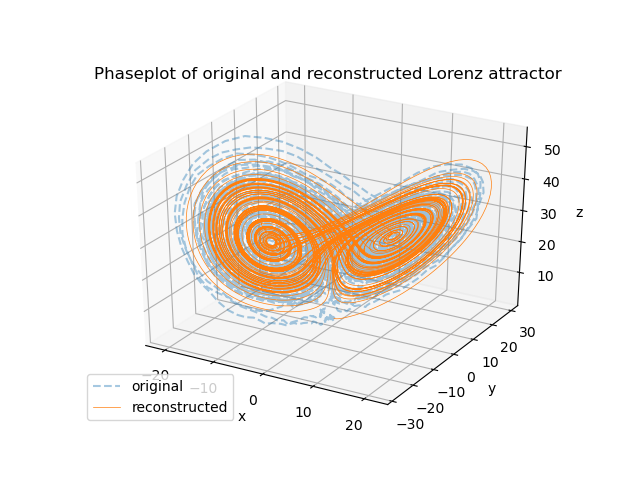

In [30]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs, label='original', linestyle="--", alpha=.4)
ax.plot(res[0], res[1], res[2], lw=0.5, label='reconstructed')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Phaseplot of original and reconstructed Lorenz attractor")
ax.legend(loc='lower left')
fig.show()

<IPython.core.display.Javascript object>


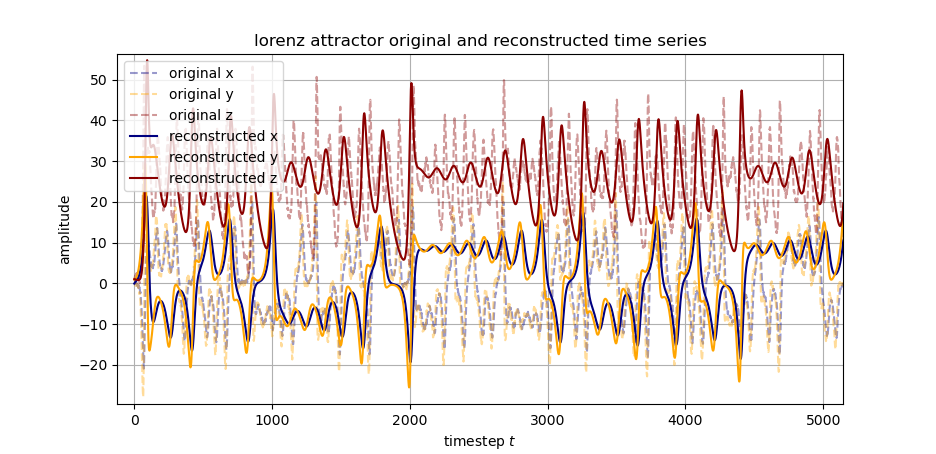

In [28]:
%matplotlib notebook
plt.plot(xs, label='original x', linestyle='--', alpha=.4, c='navy')
plt.plot(ys, label='original y', linestyle='--', alpha=.4, c='orange')
plt.plot(zs, label='original z', linestyle='--', alpha=.4, c='darkred')
plt.plot(res[0], label='reconstructed x', c='navy')
plt.plot(res[1], label='reconstructed y', c='orange')
plt.plot(res[2], label='reconstructed z', c='darkred')
plt.legend()
plt.grid()
plt.xlabel('timestep $t$')
plt.ylabel('amplitude')
plt.title('lorenz attractor original and reconstructed time series')
plt.show()